# Rain Prediction in Australia 🌦️
## [Kaggle Main Reference](https://www.kaggle.com/code/ahmedbaalash/rain-prediction-in-australia-using-ml-91)
#### Courtesy to Ahmed Baalash

Key variables include:

- Date – Observation date
- Location – Weather station
- MinTemp / MaxTemp – Minimum and maximum temperature
- Rainfall – Amount of rain in mm
- Wind & Humidity – Recorded at 9am and 3pm
- RainToday / RainTomorrow – Binary indicators for rain occurrence

This notebook aims to:

1. Clean and preprocess the data:
    - Handle missing values
    - Convert categorical data to numerical formats
    - Normalize or scale relevant features
1. Explore the dataset:
    - Perform univariate and multivariate analysis
    - Visualize distributions, trends, and correlations
1. Model the data:
    - Predict the target variable: `RainTomorrow`
    - Train and evaluate classification models (e.g., Logistic Regression, Random Forest, etc.)
1. Evaluate model performance using:
    - Accuracy, Precision, Recall, F1-Score, ROC-AUC
  
#### Target Variable
The main target for prediction is:
- `RainTomorrow`: whether it will rain the next day (Yes or No)

This is a binary classification problem, ideal for testing and comparing machine learning models on imbalanced real-world data.

In [1]:
import os
import numpy as np
import pandas as pd

#### Data Loading & Initial Cleaning

In [2]:
data_df = pd.read_csv(os.path.join('data', 'weatherAUS.csv'))

In [3]:
data_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
data_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
# Drop columns with alot of NaN values
data_df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1 , inplace = True)
data_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [12]:
data_df = data_df.dropna()

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112925 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           112925 non-null  object 
 1   Location       112925 non-null  object 
 2   MinTemp        112925 non-null  float64
 3   MaxTemp        112925 non-null  float64
 4   Rainfall       112925 non-null  float64
 5   WindGustDir    112925 non-null  object 
 6   WindGustSpeed  112925 non-null  float64
 7   WindDir9am     112925 non-null  object 
 8   WindDir3pm     112925 non-null  object 
 9   WindSpeed9am   112925 non-null  float64
 10  WindSpeed3pm   112925 non-null  float64
 11  Humidity9am    112925 non-null  float64
 12  Humidity3pm    112925 non-null  float64
 13  Pressure9am    112925 non-null  float64
 14  Pressure3pm    112925 non-null  float64
 15  Temp9am        112925 non-null  float64
 16  Temp3pm        112925 non-null  float64
 17  RainToday      112925 non-null  ob

In [17]:
pd.set_option('display.max_columns', None)
data_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


#### Date Feature Engineering

The `Date` column is converted to a proper datetime format to enable time-based feature extraction. This helps models capture seasonal patterns or trends.

Steps Covered:
- Convert the Date column to datetime format using `pd.to_datetime`.
- Extract and create three new features:
    - `day`: Day of the month
    - `month`: Month of the year
    - `year`: Year of observation

These additional temporal features can improve model performance by providing context about time-based weather behavior.

In [20]:
data_df["Date"] = pd.to_datetime(data_df["Date"])

In [21]:
data_df["day"] = data_df["Date"].dt.day
data_df["month"] = data_df["Date"].dt.month
data_df["year"] = data_df["Date"].dt.year

#### Correlation Analysis
A heatmap is used to visualize the correlation matrix of all numerical features in the dataset. This helps identify relationships between variables and detect potential multicollinearity.

Purpose:
- Understand how features are linearly related to each other.
- Identify highly correlated variables that may be useful (or redundant) for predictive modeling.

> Correlation values range from -1 (perfect negative) to +1 (perfect positive). A value near 0 indicates little to no linear correlation.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

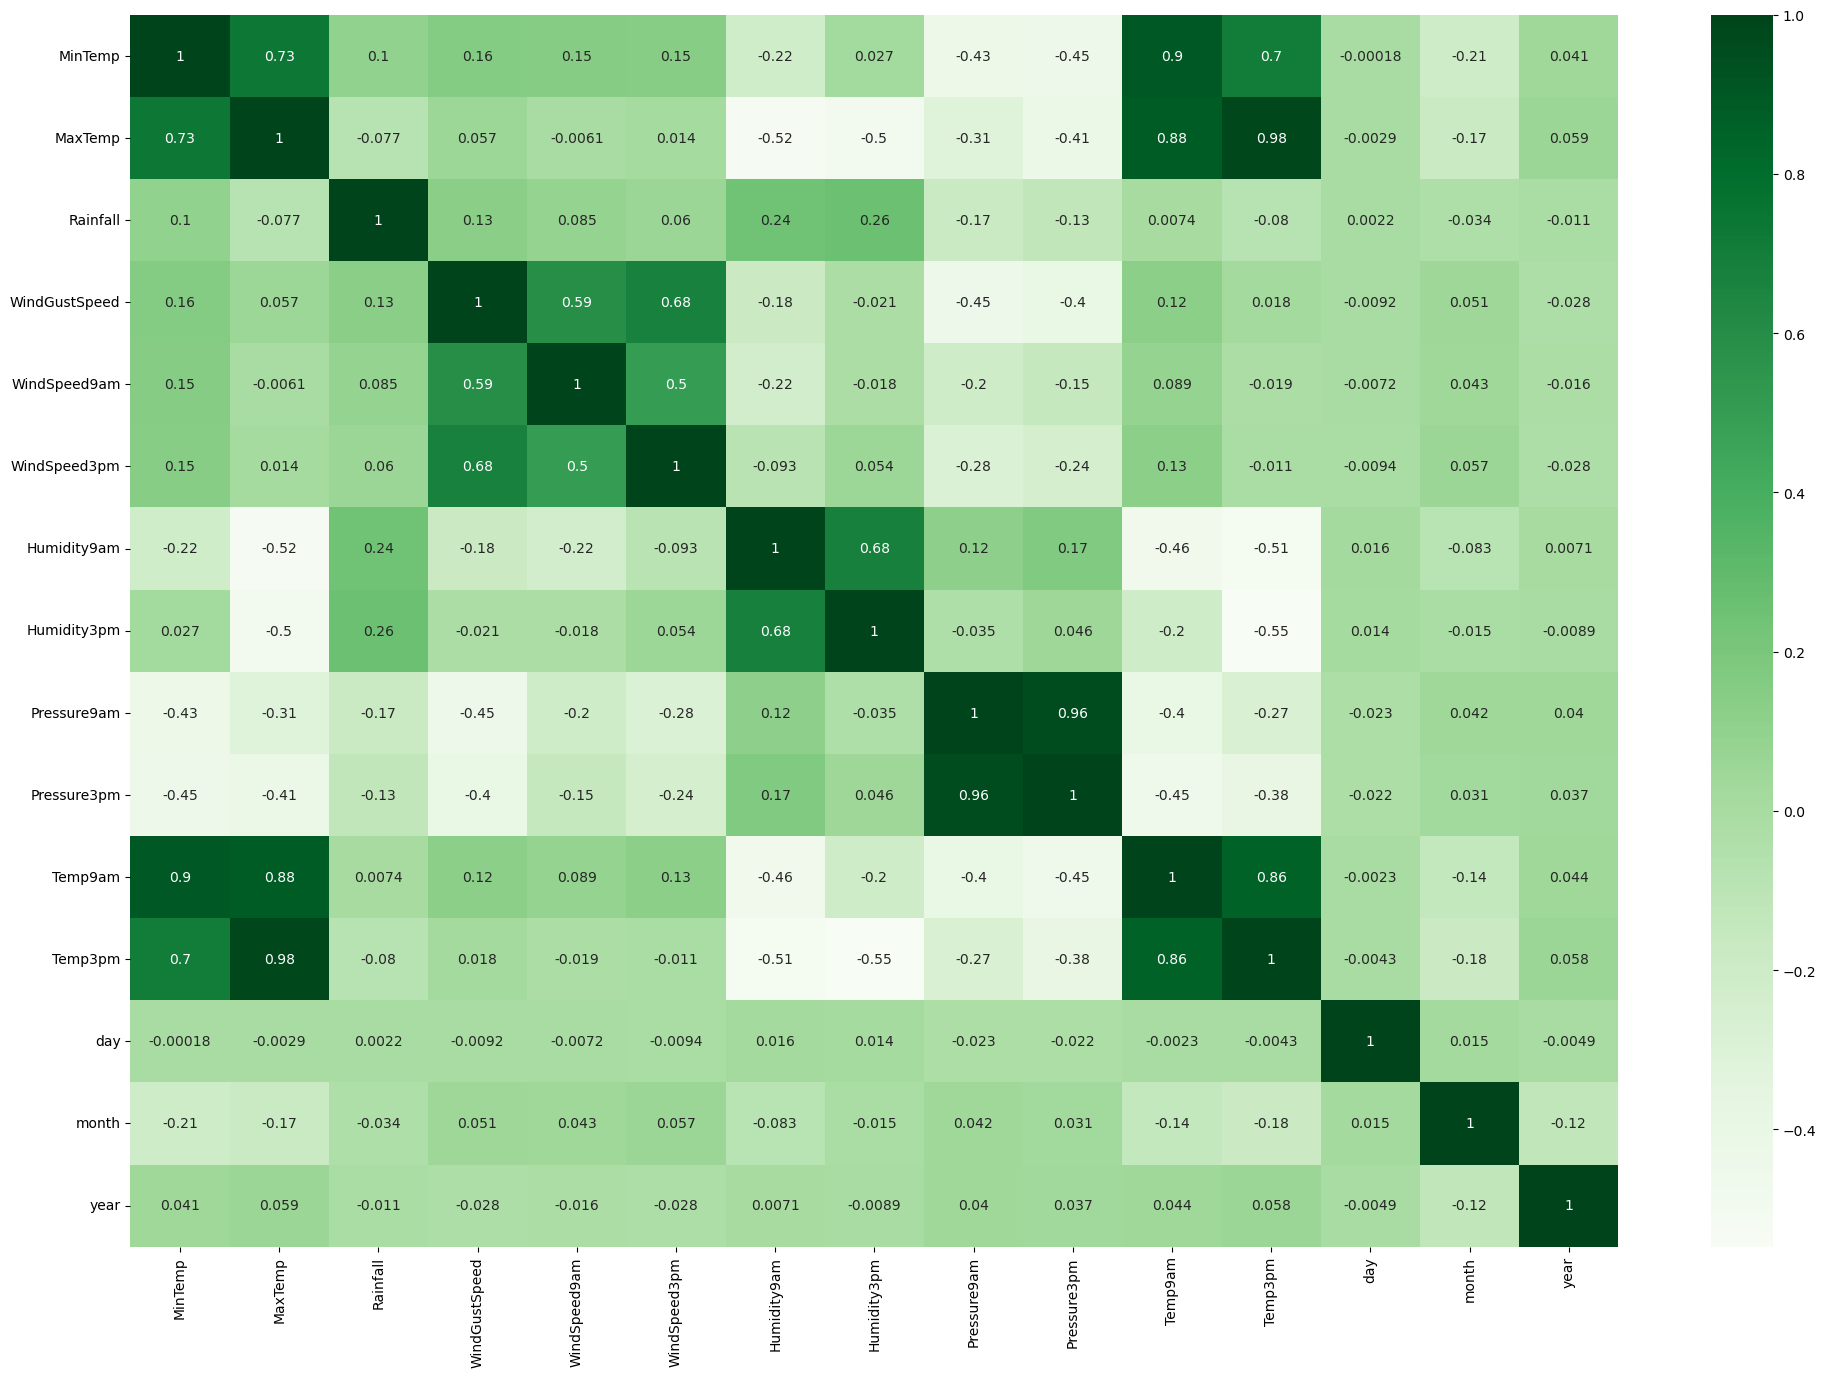

In [23]:
plt.figure(figsize=(24,16))
sns.heatmap(data_df.corr(numeric_only=True),annot=True,cmap="Greens")
plt.show()